In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

data = []
with open("output.dat") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
        
data = np.array(data)
Nbodies = int((data.shape[1] - 1)/6)
Nt = data.shape[0]

MovieWriter imagemagick unavailable; using Pillow instead.


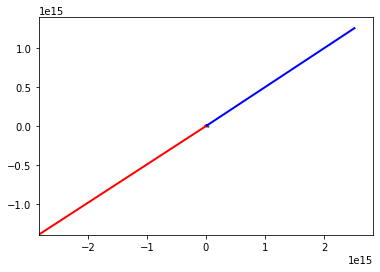

In [34]:
maxXcoord = 0
maxYcoord = 0
for i in range(data.shape[0]):
    for j in range(Nbodies):
        x = data[i][1+(j)*6]
        y = data[i][2+(j)*6]
        if(abs(x) > maxXcoord):
            maxXcoord = abs(x)
        if(abs(y) > maxYcoord):
            maxYcoord = abs(y)

fig = plt.figure()
ax = plt.axes(xlim=(-maxXcoord, maxXcoord), ylim=(-maxYcoord, maxYcoord))
#ax = plt.axes(xlim=(-1E14, 1E14), ylim=(-1E14, 1E14))
line, = ax.plot([], [], lw=3)

plotlays, plotcols = [2], ["green","red","blue"]
lines = []
for index in range(3):
    lobj = ax.plot([],[],lw=2,color=plotcols[index])[0]
    lines.append(lobj)

xlist = []
ylist = []

for j in range(Nbodies):
    xlist.append([])
    ylist.append([])
 
def init():
    for line in lines:
        line.set_data([],[])
    return lines
def animate(i):
    for j in range(Nbodies):
        x = data[100*i][1 + j*6]
        y = data[100*i][2 + j*6]
        
        xlist[j].append(x)
        ylist[j].append(y)

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=10, blit=True)
 
 
anim.save('tree_body.gif', writer='imagemagick')


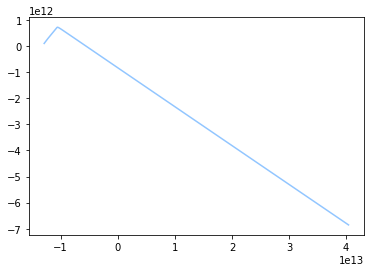

In [32]:
plt.plot(data[1:Nt,1],data[1:Nt,2])

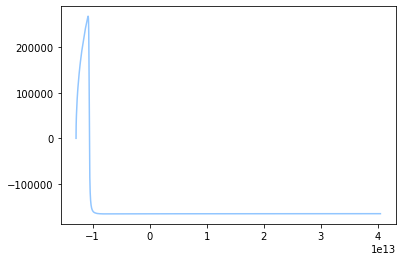

In [33]:
plt.plot(data[1:Nt,1],data[1:Nt,5])